In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile
from scipy import signal
from scipy.io import wavfile

In [3]:
input_folder = 'Data'
output_folder = 'Spectrograms'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

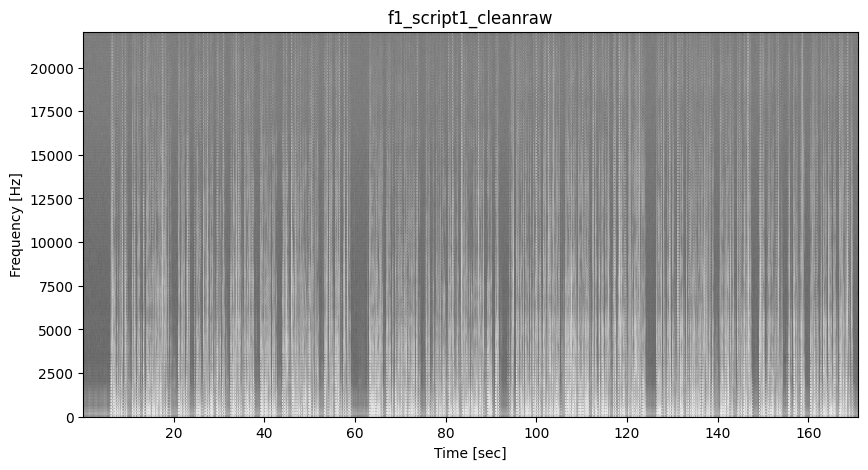

KeyboardInterrupt: 

In [48]:
for file in os.listdir(input_folder):
    if(file.endswith(".wav")):
        create_spectrogram(file, output_folder, input_folder)


In [4]:
def create_spectrogram(file, ofolder_path, ifolder_path):
    
    file_path = os.path.join(ifolder_path, file)

    sample_rate, samples = wavfile.read(file_path)
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

    base_name = os.path.splitext(os.path.basename(file))[0]

    plt.figure(figsize=(10,5))

    #Deleting cmap='gray' speeds the creation of spectrogram by 5 times, but its colorful
    plt.pcolormesh(times, frequencies, np.log(spectrogram), shading='gouraud', cmap='gray')
    plt.title(base_name)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

    new_path = os.path.join(ofolder_path, base_name + '.jpg')
    #plt.show()
    plt.savefig(new_path)
    plt.close()

In [5]:
def create_spectrogram2(file, ofolder_path, ifolder_path, fft_size = 2048, window_size=None, hop_size=None):
    
    file_path = os.path.join(ifolder_path, file)

    samples, sample_rate = soundfile.read(file_path)

    base_name = os.path.splitext(os.path.basename(file))[0]

    if not window_size:
        window_size = fft_size

    if not hop_size:
        hop_size = window_size // 4

    stft = librosa.stft(
        samples,
        n_fft = 2048,
        hop_length = hop_size,
        win_length = window_size,
        center=False,
    )
    spectrogram = np.abs(stft)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

    plt.figure(figsize=(10,5))
    librosa.display.specshow(
        spectrogram_db,
        y_axis = "log",
        x_axis = "time",
        sr = sample_rate,
        hop_length = 2048,
        win_length = window_size,
        n_fft = fft_size,
        cmap = "gray",
    )

    plt.title(base_name)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    #plt.show()

    new_path = os.path.join(ofolder_path, base_name + '.jpg')

    plt.savefig(new_path)
    plt.close()

In [6]:
def create_mel_spectrogram(file, ofolder_path, ifolder_path):
    
    file_path = os.path.join(ifolder_path, file)

    data, sample_rate = librosa.load(file_path)

    base_name = os.path.splitext(os.path.basename(file))[0]

    mel_spectrogram = librosa.feature.melspectrogram(y = data, sr = sample_rate)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref = np.max)

    plt.figure(figsize=(10,5))
    librosa.display.specshow(
        mel_spectrogram_db,
        y_axis = "log",
        x_axis = "time",
        sr = sample_rate,
        cmap = "gray",
    )

    plt.title(base_name)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    #plt.show()

    new_path = os.path.join(ofolder_path, base_name + '.jpg')

    plt.savefig(new_path)
    plt.close()